# Example to code up regression using ordinary least squares method

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 5.0)

In [6]:
# Reading data from csv file
data = pd.read_csv("data/headbrain.csv")
print(data.shape)
data.head(5)

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [7]:
# Collecting X AND Y
X = data['Head Size(cm^3)']
Y = data['Brain Weight(grams)']

# OLS Parameter compution 

In [8]:
# mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# total number of values
n = len(X)

# Using the formula to calculate a and b
numerator = 0
denomerator = 0
for i in range(n):
    numerator += (X[i] - mean_x) * (Y[i] - mean_y)
    denomerator += (X[i] - mean_x) ** 2
b = numerator / denomerator
a = mean_y - (b * mean_x)

# print coefficients
print(a, b)

325.57342104944223 0.26342933948939945


# Plotting values and regression line 

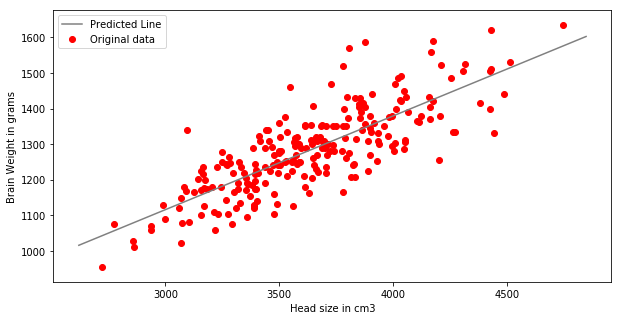

In [10]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# calculating line values x and y
x = np.linspace(min_x,max_x,1000)
y = a + b * x

# Ploting Line
_= plt.plot(x,y,color='gray',label='Predicted Line')
# PLotting Scatter Points
_= plt.scatter(X,Y,color='red',label='Original data')

_= plt.xlabel('Head size in cm3')
_= plt.ylabel('Brain Weight in grams')
_= plt.legend()
plt.show()

# Calculating Root Mean Squares Error

In [12]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(n):
    y_pred = a + b * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print(rmse)

72.1206213783709


# Calculating R square value

In [13]:
ss_t = 0
ss_e = 0
for i in range(n):
    y_pred = a + b * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_e += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_e/ss_t)
print(r2)

0.6393117199570003
